In [3]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import pickle

import time

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [4]:
with open('../../data/pickle/20221011v3_10y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [5]:
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

# 結果一覧

## リーグ・カップ戦結果

In [6]:
print("チーム一覧")
print()
league_num = 0
print(England.leagues[league_num].name)
print([[i, t.name] for i, t in enumerate(England.leagues[league_num].teams)])

print()
league_num = 1
print(England.leagues[league_num].name)
print([[i, t.name] for i, t in enumerate(England.leagues[league_num].teams)])

print()
league_num = 2
print(England.leagues[league_num].name)
print([[i, t.name] for i, t in enumerate(England.leagues[league_num].teams)])

display(England.leagues[0].champion)
display(England.leagues[1].champion)
display(England.leagues[2].champion)

display(England.competition_result_top)

チーム一覧

premier
[[0, 'Glasgow'], [1, 'London'], [2, 'Liverpool'], [3, 'Manchester'], [4, 'Newark'], [5, 'Edinburgh'], [6, 'Sunderland'], [7, 'Wolverhampton'], [8, 'Bangor'], [9, 'Birmingham'], [10, 'Richmond'], [11, 'Southampton'], [12, 'Sheffield'], [13, 'Stoke-on-Trent'], [14, 'Buenos Aires'], [15, 'Belfast'], [16, 'Vienna'], [17, 'Derby'], [18, 'Greenock'], [19, 'Shrewsbury']]

championship
[[0, 'Duisburg'], [1, 'Swansea'], [2, 'Wrexham'], [3, 'Blackburn'], [4, 'Milan'], [5, 'Nottingham'], [6, 'Geneva'], [7, 'Newcastle'], [8, 'Paisley'], [9, 'Llandudno'], [10, 'Dublin'], [11, 'Aberdeen'], [12, 'Motherwell'], [13, 'Cardiff'], [14, 'Crewe'], [15, 'Kilmarnock'], [16, 'Gothenburg'], [17, 'Middlesbrough'], [18, 'Saint-Cloud'], [19, 'Paris']]

EFL
[[0, 'Rotterdam'], [1, 'Prague'], [2, 'Haarlem'], [3, 'Basel'], [4, 'Aberdare'], [5, 'Colombes'], [6, 'The Hague'], [7, 'Viña del Mar'], [8, 'Dundee'], [9, 'Bradford'], [10, 'Kristiania'], [11, 'Gentilly'], [12, 'Antwerp'], [13, 'Brussels'], [14,

,優勝,得点王
premier_2000,Shrewsbury,Aaron(Shrewsbury) / 20点
premier_2001,Edinburgh,Armond(Richmond) / 26点
premier_2002,Newark,Ruford(Richmond) / 20点
premier_2003,Shrewsbury,Errol(Newark) / 44点
premier_2004,Shrewsbury,Doc(Sunderland) / 30点
premier_2005,Edinburgh,Ashaad(Edinburgh) / 27点
premier_2006,Edinburgh,Errol(Edinburgh) / 38点
premier_2007,Birmingham,Augustin(Glasgow) / 33点
premier_2008,Manchester,Llewellyn(Birmingham) / 28点
premier_2009,Edinburgh,Neville(Manchester) / 45点


,優勝,得点王
championship_2000,Southampton,Emidio(Bristol) / 22点
championship_2001,Llandudno,Kishaun(Nottingham) / 24点
championship_2002,Blackburn,Neville(Blackburn) / 23点
championship_2003,Llandudno,Garrett(Llandudno) / 26点
championship_2004,Blackburn,Gianfranco(Swansea) / 28点
championship_2005,Nottingham,Homero(Nottingham) / 31点
championship_2006,Stoke-on-Trent,Coye(Vienna) / 29点
championship_2007,Aberdeen,Angela(Nottingham) / 29点
championship_2008,Vienna,Angela(Nottingham) / 24点
championship_2009,Shrewsbury,Hiram(Blackburn) / 26点


,優勝,得点王
EFL_2000,Antwerp,Jujuan(Viña del Mar) / 20点
EFL_2001,Duisburg,Bereket(Dundee) / 29点
EFL_2002,Portsmouth,Monte(Greenock) / 27点
EFL_2003,Budapest,Themis(Milan) / 27点
EFL_2004,Karlsruhe,Glen(Karlsruhe) / 31点
EFL_2005,Budapest,Alvino(Budapest) / 31点
EFL_2006,Newcastle,Blair(The Hague) / 32点
EFL_2007,Bristol,Urian(Basel) / 31点
EFL_2008,Cardiff,Rafael(Cardiff) / 31点
EFL_2009,Paris,Lamir(Bristol) / 32点


,年度,優勝,準優勝,得点王
FA杯_2000,2000,Manchester(premier),Richmond(premier),Shalom(Manchester(premier)) / 6点
FA杯_2001,2001,Richmond(premier),Bangor(premier),Ruford(Richmond(premier)) / 8点
FA杯_2002,2002,Bangor(premier),Birmingham(premier),Ashaad(Sunderland(premier)) / 10点
FA杯_2003,2003,Sheffield(premier),Bangor(premier),Markelle(Crewe(premier)) / 7点
FA杯_2004,2004,Sunderland(premier),Sheffield(premier),Markelle(Crewe(premier)) / 6点
FA杯_2005,2005,Birmingham(premier),London(premier),Christophe(Cardiff(premier)) / 7点
FA杯_2006,2006,Edinburgh(premier),Newark(premier),Errol(Edinburgh(premier)) / 7点
FA杯_2007,2007,Bangor(premier),Paisley(premier),Ashaad(Bangor(premier)) / 8点
FA杯_2008,2008,Bangor(premier),Manchester(premier),Raynor(Buenos Aires(premier)) / 7点
FA杯_2009,2009,Manchester(premier),Liverpool(premier),Neville(Manchester(premier)) / 10点


## チームごとの結果

In [7]:
league_num = 0
team_num = 3
year = 2009

print(England.leagues[league_num].teams[team_num].name)
b = England.leagues[league_num].teams[team_num].competition_result
display(pd.DataFrame(b.values(), index=b.keys(), columns=["ラウンド"]))
display(England.leagues[league_num].teams[team_num].result)

output = England.players_result
output = output[output["チーム"]==England.leagues[league_num].teams[team_num].name]
output = output[output["分類"]=="リーグ"]
display(output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS"]].sort_values("試合数", ascending=False).head(40))

Manchester


,ラウンド
FA杯_2000,優勝
FA杯_2001,3回戦
FA杯_2002,2回戦
FA杯_2003,2回戦
FA杯_2004,3回戦
FA杯_2005,2回戦
FA杯_2006,3回戦
FA杯_2007,2回戦
FA杯_2008,準優勝
FA杯_2009,優勝


,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
premier_2000,14,16,8,32,36,-4,50,13位,premier
premier_2001,17,13,8,53,35,18,59,8位,premier
premier_2002,15,13,10,40,35,5,55,10位,premier
premier_2003,19,14,5,58,39,19,62,7位,premier
premier_2004,24,7,7,70,31,39,79,4位,premier
premier_2005,18,12,8,63,38,25,62,8位,premier
premier_2006,18,11,9,67,48,19,63,6位,premier
premier_2007,22,9,7,79,45,34,73,5位,premier
premier_2008,29,2,7,103,24,79,94,1位,premier
premier_2009,32,1,5,108,22,86,101,2位,premier


,試合数,goal,assist,CS
uuid,,,,
ee1e5d4c-490c-11ed-857c-00155d14f69a,250,97,28,105
ede91574-490c-11ed-857c-00155d14f69a,208,44,46,81
ede13f34-490c-11ed-857c-00155d14f69a,181,35,26,79
ede2de02-490c-11ed-857c-00155d14f69a,150,19,14,57
ee2e439c-490c-11ed-857c-00155d14f69a,132,5,1,52
ede031c0-490c-11ed-857c-00155d14f69a,129,22,10,51
ede3c1b4-490c-11ed-857c-00155d14f69a,119,2,5,45
ef12a3f2-490c-11ed-857c-00155d14f69a,115,3,3,45
edf39ef4-490c-11ed-857c-00155d14f69a,114,0,0,37


In [9]:
year = 2000
output = England.players_result
output = output[output["レンタル元"]==England.leagues[league_num].teams[team_num].name]
output[output["年度"]==year]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
35,Taelyn,eddf41c0-490c-11ed-857c-00155d14f69a,27,74,2,CAM,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
36,Alma,ede0b618-490c-11ed-857c-00155d14f69a,24,74,2,ST,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
37,Abram,ede83b54-490c-11ed-857c-00155d14f69a,26,73,2,GK,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
38,Nolan,ede8c042-490c-11ed-857c-00155d14f69a,18,71,4,ST,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
39,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,18,68,3,RW,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,


## 選手ごとの結果

,名前,年齢,生まれ年,成長タイプ
426,Hamp,28,1982,general


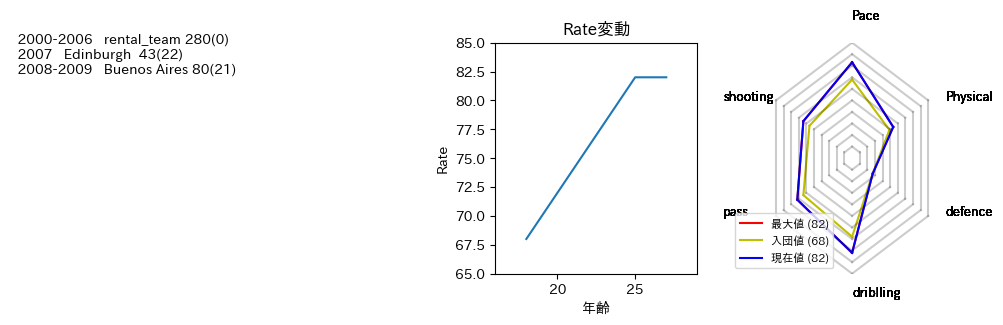

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
39,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,18,68,3,RW,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
3329,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,19,70,2,LW,rental_league,2001,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
6632,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,20,72,1,RW,rental_league,2002,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
9931,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,21,74,0,RW,rental_league,2003,rental_team,Manchester,レンタルリーグ,記録なし,40,0,0,0,0,
13250,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,22,76,3,LW,rental_league,2004,rental_team,Edinburgh,レンタルリーグ,記録なし,40,0,0,0,0,
16551,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,23,78,2,RW,rental_league,2005,rental_team,Edinburgh,レンタルリーグ,記録なし,40,0,0,0,0,
19850,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,24,80,1,LW,rental_league,2006,rental_team,Edinburgh,レンタルリーグ,記録なし,40,0,0,0,0,
23729,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,25,82,0,RW,premier,2007,Edinburgh,,リーグ,4位,38,22,7,15,0,
27559,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,26,82,2,LW,premier,2008,Buenos Aires,,リーグ,8位,36,10,7,6,3,
30795,Hamp,ede8ec0c-490c-11ed-857c-00155d14f69a,27,82,1,LW,premier,2009,Buenos Aires,,リーグ,10位,38,9,6,7,0,


In [10]:
uuid_ = "ede8ec0c-490c-11ed-857c-00155d14f69a"
print_player(England, all_member, uuid_)

## 年ごとの結果

In [ ]:
year = 2026
league_num = 0
league_name = f"{England.leagues[league_num].name}_{year}"
competition_name = f"FA杯_{year}"
England.leagues[league_num].team_result[league_name]
England.competition_result[competition_name]

In [ ]:
output = England.players_result
output.sort_values("Rate", ascending=False).head(30)

In [ ]:
all_member.sort_values("年齢", ascending=False).head(30)

In [ ]:
all_member[all_member["成長タイプ"]=="legend"]

## 全選手成績

In [ ]:
output = England.players_result
#output = output[output["チーム"]==England.leagues[league_num].teams[team_num].name]
#output = output[output["分類"]=="リーグ"]
output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS", "怪我欠場"]].sort_values("試合数", ascending=False).head(10)

In [ ]:
uuid_ = "1e203c00-48b7-11ed-b2b6-00155d14f69a"
print_player(England, all_member, uuid_)

## データ保存

In [7]:
with open('../data/pickle/20221011v2_30y.pickle', mode='wb') as f:
    pickle.dump(England, f)